In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Retrain the MLP

import pandas as pd

file_path = '/content/drive/My Drive/data0199.csv'
df = pd.read_csv(file_path)
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
import time
from joblib import dump




X = df.drop('agbd', axis=1)
y = df['agbd']

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score


X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)  # 划分出70%的数据作为训练集


X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)  # 划分出15%的数据作为验证集，15%的数据作为测试集
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()


X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)



model = Sequential()
model.add(Dense(units=128, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=16, activation='relu'))
model.add(Dense(units=1, activation='linear'))



model.compile(optimizer='Adam', loss='mean_squared_error')


from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10)


history = model.fit(X_train, y_train, epochs=100, batch_size=256, validation_data = (X_valid, y_valid), callbacks=early_stopping)





predictions = model.predict(X_test)


rmse = np.sqrt(mean_squared_error(y_test, predictions))
print(f'测试集 Mean Squared Error: {rmse}')

r2 = r2_score(y_test, predictions)
print(f'测试集 R-squared (R平方) 值为: {r2}')

mae = mean_absolute_error(y_test, predictions)
print("测试集 MAE: ", mae)


Epoch 1/100
15319/15319 [==============================] - 82s 5ms/step - loss: 2668.4756 - val_loss: 2528.8596
Epoch 2/100
15319/15319 [==============================] - 84s 6ms/step - loss: 2522.1191 - val_loss: 2499.3479
Epoch 3/100
15319/15319 [==============================] - 81s 5ms/step - loss: 2489.7681 - val_loss: 2476.2339
Epoch 4/100
15319/15319 [==============================] - 81s 5ms/step - loss: 2466.2290 - val_loss: 2467.8508
Epoch 5/100
15319/15319 [==============================] - 84s 6ms/step - loss: 2449.5659 - val_loss: 2433.0002
Epoch 6/100
15319/15319 [==============================] - 82s 5ms/step - loss: 2436.2493 - val_loss: 2422.7554
Epoch 7/100
15319/15319 [==============================] - 86s 6ms/step - loss: 2426.1221 - val_loss: 2424.3306
Epoch 8/100
15319/15319 [==============================] - 84s 5ms/step - loss: 2418.1562 - val_loss: 2411.9023
Epoch 9/100
15319/15319 [==============================] - 80s 5ms/step - loss: 2412.4712 - val_loss: 24

<ipython-input-15-afc6e5b2c692>:17: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  inferno = plt.cm.get_cmap('inferno', 256)


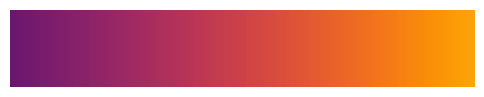

In [ ]:
 #Use a custom color map.

import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LinearSegmentedColormap

def custom_inferno_cmap(start=0.0, stop=1.0):

    inferno = plt.cm.get_cmap('inferno', 256)
    newcolors = inferno(np.linspace(start, stop, 256))
    newcmp = LinearSegmentedColormap.from_list("cut_inferno", newcolors)

    return newcmp


plt.figure(figsize=(6, 1))
plt.imshow([np.linspace(0, 100, 256)], aspect='auto', cmap=custom_inferno_cmap(0.3, 0.8))
plt.axis('off')
plt.show()

<ipython-input-15-afc6e5b2c692>:17: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  inferno = plt.cm.get_cmap('inferno', 256)


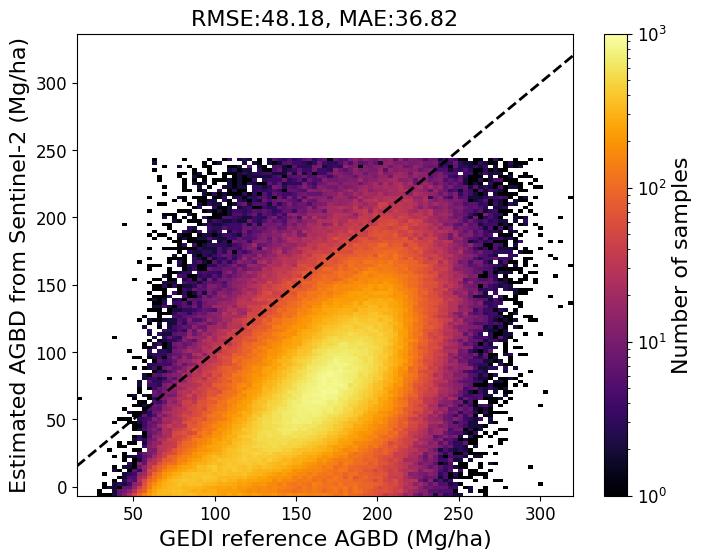

In [ ]:
# Confusion plot generation

from matplotlib.colors import LogNorm
norm = LogNorm(vmin=1, vmax=1000)

import matplotlib.pyplot as plt
import numpy as np


y_actual = y_test.ravel()
y_predicted = predictions.ravel()

# Caluculate density
x_edges = np.linspace(min(y_actual), max(y_actual), 100)
y_edges = np.linspace(min(y_predicted), max(y_predicted), 100)
hist, x_edges, y_edges = np.histogram2d(y_actual, y_predicted, bins=(x_edges, y_edges))


x_center = (x_edges[:-1] + x_edges[1:]) / 2
y_center = (y_edges[:-1] + y_edges[1:]) / 2


plt.figure(figsize=(8, 6))
plt.imshow(hist, extent=[x_edges[0], x_edges[-1], y_edges[0], y_edges[-1]], origin='lower', cmap=custom_inferno_cmap(0, 1), aspect='auto', norm=norm)
cbar = plt.colorbar(label='Number of samples')
cbar.set_label('Number of samples', fontsize=16)
cbar.ax.tick_params(labelsize=12)

plt.xlabel('GEDI reference AGBD (Mg/ha)', fontsize=16)
plt.ylabel('Estimated AGBD from Sentinel-2 (Mg/ha)', fontsize=16)
plt.title('RMSE:48.18, MAE:36.82', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Line y=x
plt.plot([min(y_actual), max(y_actual)], [min(y_actual), max(y_actual)], color='black', linestyle='--', lw=2)


plt.show()